# Imports

Nessecary imports

In [1]:
# Import neccesarry libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data
df = pd.read_csv('telecom_churn.csv')

In [2]:
# Split dataset
y = df.Churn
X = df.drop("Churn", axis=1)

# Churn vs Non-Churn

0    2850
1     483
Name: Churn, dtype: int64


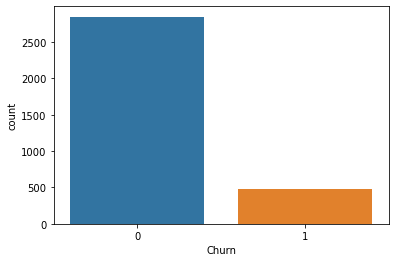

In [3]:
# Visualize the amount of churn vs non-churn
print(df["Churn"].value_counts())
sns_plot = sns.countplot(y,label="Count")
sns_plot.figure.savefig('images/bar_diagram_churn.jpg')

# Characteristics about dataset

In [4]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
# See if we have any missing values
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
# Check for indexing
df.Churn

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

# Correlation matrix

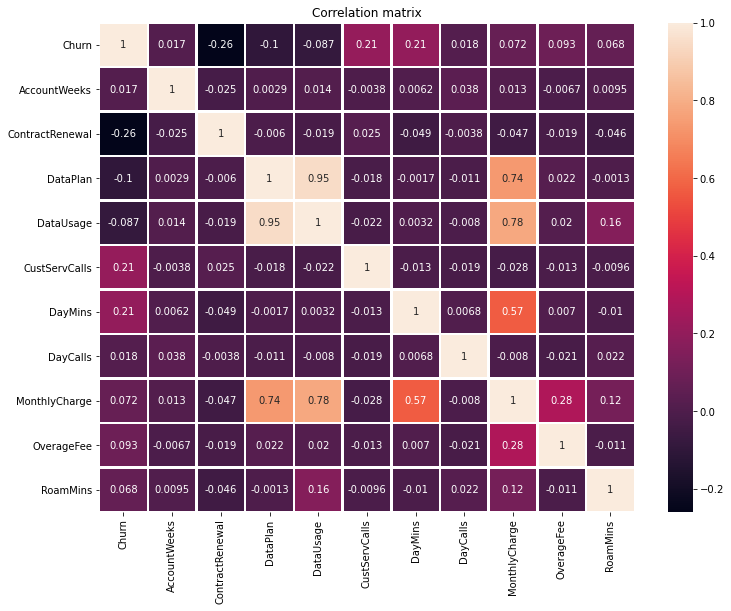

In [8]:
# Visualize the correlation between features

corr = df.corr()
plt.figure(figsize=(12, 9))

sns_plot = sns.heatmap(corr, annot=True, linewidths=1.5)
sns_plot.set_title("Correlation matrix")
sns_plot.figure.savefig('images/correlation_matrix.jpg')

In [9]:
# Which features affect Churn more
corr["Churn"]

Churn              1.000000
AccountWeeks       0.016541
ContractRenewal   -0.259852
DataPlan          -0.102148
DataUsage         -0.087195
CustServCalls      0.208750
DayMins            0.205151
DayCalls           0.018459
MonthlyCharge      0.072313
OverageFee         0.092812
RoamMins           0.068239
Name: Churn, dtype: float64

# Remove features from dataset

In [10]:
# Remove the features MonthlyCharge and DataUsage
df_features = df.drop(["MonthlyCharge", "DataUsage"], axis=1)

y = df_features.Churn
X = df_features.drop("Churn", axis=1)

# Correlation matrix

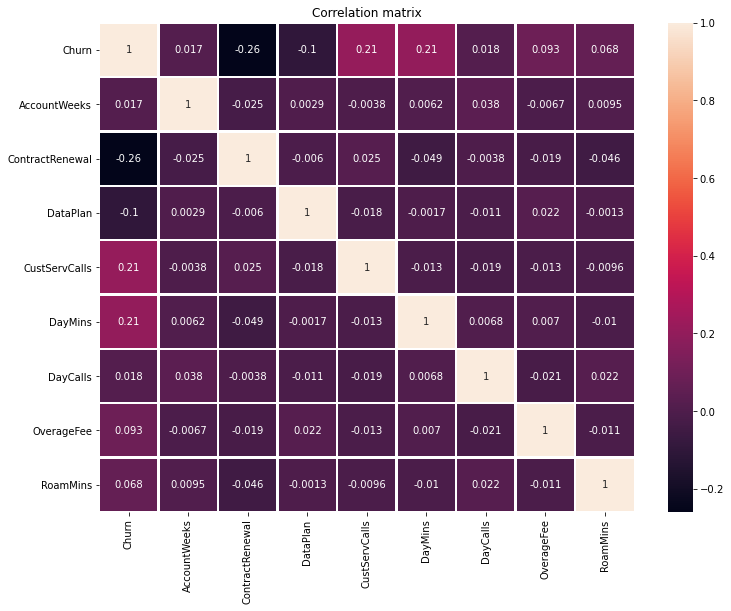

In [11]:
# Visualize correlation matrix after removed features
corr = df_features.corr()
plt.figure(figsize=(12, 9))

sns_plot = sns.heatmap(corr, annot=True, linewidths=1.5)
sns_plot.set_title("Correlation matrix")
sns_plot.figure.savefig('images/correlation_matrix_after.jpg')

In [12]:
# Check features that affect Churn more after removed features
corr["Churn"]

Churn              1.000000
AccountWeeks       0.016541
ContractRenewal   -0.259852
DataPlan          -0.102148
CustServCalls      0.208750
DayMins            0.205151
DayCalls           0.018459
OverageFee         0.092812
RoamMins           0.068239
Name: Churn, dtype: float64